# Progetto Finale di Introduzione alla Data Science

Autore: Lorenzo La Corte - S4784539

Dataset: **Google Play Store Apps**

## Operazioni Preliminari

Importo le librerie di base:

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
# !pip install scipy==1.7.0
import scipy
print (scipy.__version__)

1.7.1


Importo il dataset:

In [36]:
playstore = pd.read_csv('googleplaystore.csv') #importo il file
playstore.head() # visualizza le prime entry del dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Visualizzo numero di righe e di caratteristiche.

In [37]:
playstore.shape # restituisce (numero di righe, numero di colonne)


(10841, 13)

## Pulizia del Dataset 

Divido il dataset in features qualitative e quantitative:

In [38]:
# la [[]] crea dataframe con sezioni di caratteristiche
quantitative_playstore = playstore[['Rating','Reviews','Size','Installs','Price']] 
qualitative_playstore = playstore[['App','Category','Type','Content Rating','Genres', 'Last Updated', 'Current Ver', 'Android Ver']]

Adesso utilizzo il metodo describe() e noto che esso mi restituisce solo Rating come variabile quantitativa.



In [39]:
# quantitative_playstore.describe()
playstore.describe() # mi dovrebbe dare la stessa cosa (solo le quantitative)

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Probabilmente devo pulire la tabella in modo da rendere 'Reviews', 'Size', 'Installs', 'Price' quantitative.

Quindi:
1. Convertire la size delle app a MB per semplificare la visualizzazione
2. Rimuovere il '+' da 'Installs' per renderlo quantitativo
3. Scoprire perché reviews e price non sono quantitative
4. Gestire i valori nulli se ci sono


## Gestione delle Variabili Quantitative

La size risulta non quantitativa: la colonna è composta da stringhe.

Converto quindi queste stringhe in interi per rendere questa caratteristica quantitativa e poi converto la size delle app a MB per semplificare la visualizzazione:

Rimuovo il '+' da 'Installs' per renderlo quantitativo:

In [41]:
if(type(playstore['Size'][0]) is str):
    
    # prendo una media delle Size che non sono Varies with device

    playstore['Size'] = [float(x.replace("Varies with device", np.nan).replace(",",".").replace("+","").replace("M","000000").replace("k","000")) for x in playstore['Size']]
    
    playstore['Size'] = [x.replace(None,str(playstore['Size'].mean())) for x in playstore['Size']]

    playstore['Size'] = [(x / 10**6) for x in playstore['Size']]
    
playstore.describe()

TypeError: replace() argument 2 must be str, not float

In [7]:
if(type(playstore['Installs'][0]) is str):
    playstore = playstore[playstore.Installs != "Free"] # rimuovo le righe con questo valore per Installs
    playstore['Installs'] = [float(x.replace("+","").replace(",",".").replace(".","")) for x in playstore['Installs']]
    
playstore.describe()

,Rating,Size,Installs
count,9366.000000,10840.000000,1.084000e+04
mean,4.191757,19.577147,1.546434e+07
std,0.515219,22.083796,8.502936e+07
min,1.000000,0.000001,0.000000e+00
25%,4.000000,0.000007,1.000000e+03
50%,4.300000,18.000000,1.000000e+05
75%,4.500000,26.000000,5.000000e+06
max,5.000000,100.000000,1.000000e+09


Analizzo ora le feature Reviews e P

In [8]:
print(type(playstore['Reviews'][0]))
print(type(playstore['Price'][0]))


<class 'str'>
<class 'str'>


Devo convertire anche loro al fine di renderli quantitativi

In [9]:
if(type(playstore['Reviews'][0]) is str):
    playstore['Reviews'] = [float(x.replace("M","000000")) for x in playstore['Reviews']]

if(type(playstore['Price'][0]) is str):
    playstore = playstore[playstore.Price != "Everyone"] # rimuovo le righe con questo valore per Price
    playstore['Price'] = [float(x.replace("$","")) for x in playstore['Price']]

playstore.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,19.577147,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22.083796,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000001,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,0.000007,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,18.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


## Gestione dei Valori Nulli

In [10]:
qualitative_playstore.describe()

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10840,10840,10841,10841,10833,10838
unique,9660,34,3,6,120,1378,2832,33
top,ROBLOX,FAMILY,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,10039,8714,842,326,1459,2451


Notiamo che le colonne hanno piu' o meno tutte lo stesso valore per count, quindi possiamo immaginare ci siano pochi valori nulli per le variabili quantitative, mentre i rating sembrano essere circa mille in meno; verifichiamo con:

In [11]:
# dobbiamo verificare che le entry siano nulle e non NaN o qualcos'altro
playstore.isnull().sum() # ci da tutte le occorrenze nulle

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Prendiamo in considerazione quindi la colonna "Rating". Abbiamo due soluzioni:
1. Eliminare le righe con elementi nulli oppure
2. Provare a completarle. 

In [12]:
# Soluzione 2 (per Rating)
average_rating = playstore['Rating'].mean()
print(average_rating)
playstore['Rating'].fillna(average_rating, inplace = True) # completa i mancanti con la media degli altri

# Soluzione 1 (per i pochi altri valori nulli)
playstore.dropna(how ='any', inplace = True)

# Risultato
playstore.isnull().sum()

4.191757420456978


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Ho quindi adottato la soluzione del completamento per Rating e di eliminazione per gli altri valori nulli.

## Elimazione Duplicati
Come ultimo guardo se ci sono duplicati nel dataset e nel caso li rimuovo.

In [13]:
playstore[playstore.duplicated(['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,19.575341,5000000.0,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872.0,19.575341,10000000.0,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991.0,19.575341,5000000.0,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37.000000,10000000.0,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,19.575341,1000000.0,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145.0,0.000001,100000.0,Free,0.0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981.0,0.000004,1000000.0,Free,0.0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410.0,60.000000,50000.0,Free,0.0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599.0,12.000000,1000000.0,Free,0.0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


Senbrano esserci molte app duplicate; ne analizzo una:

In [14]:
playstore[playstore['App']=="ZOOM Cloud Meetings"]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37.0,10000000.0,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,37.0,10000000.0,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up


Effettivamente lo è; elimino quindi tutti i duplicati presenti nel dataset.

In [15]:
playstore = playstore.drop_duplicates(keep='last',subset=['App'])

Guardo ora il datastet:

In [16]:
print(playstore.shape)

playstore.describe()

(9648, 13)


,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9648.000000,9.648000e+03,9648.000000
mean,4.176086,2.168957e+05,18.542551,7.802970e+06,1.098122
std,0.494191,1.831767e+06,21.773745,5.379994e+07,16.861193
min,1.000000,0.000000e+00,0.000001,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,0.000006,1.000000e+03,0.000000
50%,4.200000,9.740000e+02,16.000000,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.812821e+07,100.000000,1.000000e+09,400.000000


Abbiamo rimosso circa duemila righe ma i valori ora hanno un senso e il dataset è pulito e ordinato: siamo pronti ad una prima analisi delle feature.

In [17]:
playstore.to_csv("googleplaystore_clean.csv")

# Analisi delle Feature

Cerchiamo di analizzare alcune features, per estrapolare interessanti informazioni su di esse e le loro correlazioni. 

Andiamo inanzitutto a dare un'occhiata alla tabella delle correlazioni.

In [18]:
playstore.corr().style.background_gradient(cmap="Blues")

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.054390,0.053694,0.039311,-0.019341
Reviews,0.054390,1.000000,0.086658,0.625023,-0.007594
Size,0.053694,0.086658,1.000000,0.061339,-0.022441
Installs,0.039311,0.625023,0.061339,1.000000,-0.009414
Price,-0.019341,-0.007594,-0.022441,-0.009414,1.000000


Notiamo una correlazione tra Reviews e Installs.

# Analisi su Rating di App Gratuite o a Pagamento
In questa prima analisi ci concentriamo principalmente sulle feature Rating e Price, pondendoci 3 domande:

1. qual'è la distribuzione dei Rating?

2. qual'è la percentuale di app a pagamento e app gratuite?

3. T-Test: le app gratuite sono piu' gradite di quelle a pagamento?



(0.995, 1.8]      43
(1.8, 2.6]       127
(2.6, 3.4]       546
(3.4, 4.2]      4595
(4.2, 5.0]      4337
Name: Rating, dtype: int64


<AxesSubplot:>

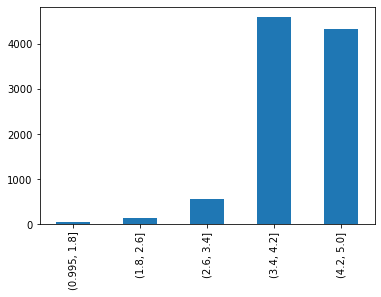

In [19]:
Ratings = playstore['Rating']
Ratings = Ratings.value_counts(bins=5, sort=False) # divido in 20 classi di prezzo 
print(Ratings)
Ratings.plot(kind = 'bar')

Notiamo che la maggior parte delle valutazioni degli utenti sono positive.

Andiamo ora ad osservare la percentuale di app a pagamento e app gratuite.

In [20]:
free_apps = playstore[playstore['Price']==0]
paid_apps = playstore[playstore['Price']>0]

perc_app_gratis = len(free_apps) / playstore.shape[0]
perc_app_pagate = len(paid_apps) / playstore.shape[0]

print("Percentuale di app gratis: " + str(perc_app_gratis))
print("Percentuale di app a pagamento: " + str(perc_app_pagate))

Percentuale di app gratis: 0.9221600331674958
Percentuale di app a pagamento: 0.07783996683250415


### T-Test: le app gratuite sono piu' gradite di quelle a pagamento?

Formuliamo ora un'ipotesi circa il gradimento di app gratuite e a pagamento, usando la seguente notazione:

H0 = "il gradimento delle app gratuite è maggiore del gradimento delle app a pagamento". 

A questo punto l'ipotesi alternativa è:

HA = "il gradimento delle app gratuite è minore o uguale del gradimento delle app a pagamento". 


Ritengo un app gradita se ha almeno 3.5 di media tra le sue recensioni.


Usiamo un **t-test a una coda** per verificare se l'ipotesi nulla è corretta.

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

In [21]:
campione = free_apps['Rating'].sample(n = 500) # prendo un campione di 500 app scelte casualmente
print("Grandezza campione:\t\t " + str(campione.shape))
print("Media sul campione:\t\t " + str(np.mean(campione)))

popolazione_restante = paid_apps['Rating']
print("Popolazione restante:\t\t " + str(popolazione_restante.shape))
print("Media sulla popolazione restante: " + str(np.mean(popolazione_restante)))

Grandezza campione:		 (500,)
Media sul campione:		 4.145415246636766
Popolazione restante:		 (751,)
Media sulla popolazione restante: 4.24814297002532


Abbiamo considerato un campione di 500 app gratuite, e di 721 app a pagamento. 

Le condizioni del t-test sono quindi verificate, infatti:

Campione = 500 app gratuite;
Popolazione totale = 9135

Quindi le due condizioni sono verificate. 
Eseguiamo il t-test usando la libreria scipy. Scegliamo un intervallo di confidenza pari a 0.95. 

In [22]:
t_statistic, p_value = stats.ttest_1samp(a= campione, popmean= popolazione_restante.mean(),alternative='greater')
print(t_statistic)
print(p_value)

-4.225919584543793
0.9999858501246547


*p-value > livello di confidenza*, infatti: 0.99 > 0.05

H0 è quindi accettata, quindi **il gradimento delle app gratuite è maggiore del gradimento delle app a pagamento**.


# Analisi su Installazioni e Categorie
In questa seconda analisi ci concentriamo principalmente sulle feature Category e Installs, pondendoci varie domande:

1. quali sono le categorie con piu' app sullo store?

2. quali sono le categorie con piu' installazioni?

3. t-test: le app di social network e messaggistica sono piu' installate di qualsiasi altra categoria?

### Categorie con il maggior numero di App sullo Store

<AxesSubplot:>

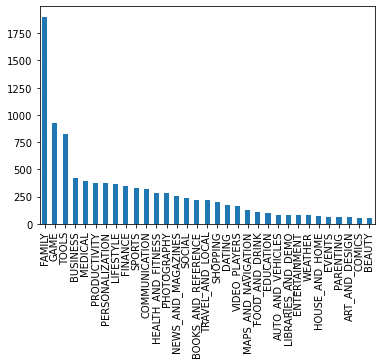

In [23]:
playstore['Category'].value_counts().plot.bar()

### Categorie con il maggior numero di Installazioni

<AxesSubplot:xlabel='Category'>

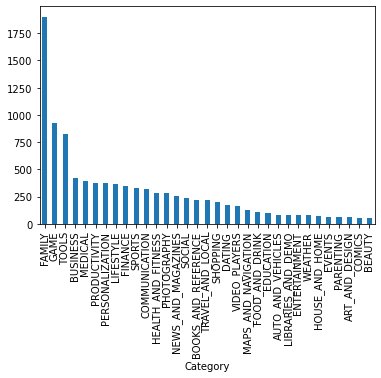

In [24]:
most_installed_cat = playstore.groupby(["Category"]).count()
most_installed_cat.sort_values("App", ascending=False)["App"].plot.bar()

### 100 App piu' installate e le loro categorie
Visualizziamo ora le 100 app piu' installate e su di esse proviamo a ripetere la statistica delle categorie e vedere se è conforme.

<AxesSubplot:xlabel='Category'>

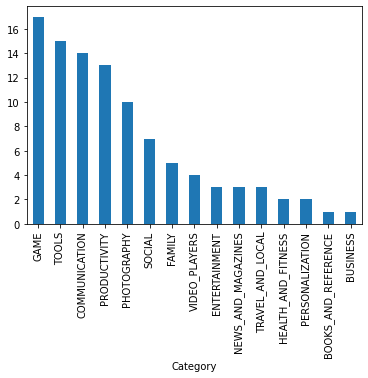

In [25]:
most_installed = playstore.nlargest(100, ['Installs'])

most_installed_cat = most_installed.groupby(["Category"]).count()

most_installed_cat.sort_values("App", ascending=False)["App"].plot.bar()

### 20 App piu' installate e le loro categorie
Visualizziamo ora le 20 app piu' installate e su di esse proviamo a ripetere la statistica delle categorie e vedere se è conforme.

<AxesSubplot:xlabel='Category'>

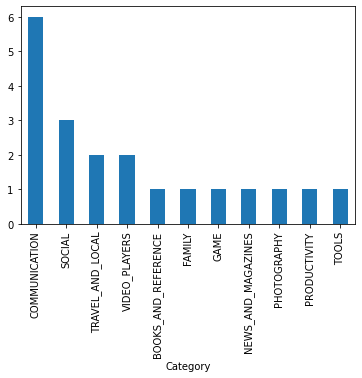

In [26]:
most_installed = playstore.nlargest(20, ['Installs'])

most_installed_cat = most_installed.groupby(["Category"]).count()

most_installed_cat.sort_values("App", ascending=False)["App"].plot.bar()

### T-Test:  le 20 app piu' installate hanno gradimento maggiore rispetto alle altre app?

Formuliamo ora un'ipotesi circa il numero di installazioni di app di networking e messaggistica, usando la seguente notazione:

H0 = "il gradimento delle 20 app piu' installate è maggiore del gradimento delle app in generale". 

A questo punto l'ipotesi alternativa è:

H0 = "il gradimento delle 20 app piu' installate è minore o uguale del gradimento delle app in generale". 

Usiamo un **t-test a una coda** per verificare se l'ipotesi nulla è corretta.

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

# Analisi su Prezzo e Categorie
In questa terza analisi ci concentriamo principalmente sulle feature Genres e Price:
Ci interessa scoprire se la distribuzione di app gratuite o a pagamento è circa la stessa nelle varie categorie; prendiamo per esempio la categoria con piu' app (Family) e quella con piu' installazioni (Game),

Eseguiamo un **test del chi-quadrato**, con le seguenti ipotesi:

H0 = Il prezzo delle applicazioni nella categoria Game (observed) segue la stessa statistica della categoria Family (expected).

HA = La distribuzione dei prezzi e' diversa. 

In [27]:
# da generalizzare a tutte le categorie

free_apps_game = playstore[(playstore['Price']==0) & (playstore['Category']=="GAME")]
paid_apps_game = playstore[(playstore['Price']>0) & (playstore['Category']=="GAME")]

perc_free_apps_game = len(free_apps_game) / (len(free_apps_game)+len(paid_apps_game))
perc_paid_apps_game = 1 - perc_free_apps_game 

game_free = len(playstore[playstore['Category']=="FAMILY"]) * perc_free_apps_game
game_paid = len(playstore[playstore['Category']=="FAMILY"]) * perc_paid_apps_game

free_apps_fam = playstore[(playstore['Price']==0) & (playstore['Category']=="FAMILY")]
paid_apps_fam = playstore[(playstore['Price']>0) & (playstore['Category']=="FAMILY")]

fam_free = len(free_apps_fam)
fam_paid = len(paid_apps_fam)

fam = [fam_free,fam_paid]
game = [game_free,game_paid]

print("Valori per Family: " + str(fam))
print("Valori per Game: " + str(game))

chi_squared, p_value = stats.chisquare(f_obs= fam, f_exp= game)

print("Valore del Chi-Quadrato: " + str(chi_squared))
print("Valore del p-value: " + str(p_value))

Valori per Family: [1718, 184]
Valori per Game: [1733.5723542116632, 168.42764578833686]
Valore del Chi-Quadrato: 1.579660320202722
Valore del p-value: 0.2088096284086815
